(50000, 28, 28) (50000,)


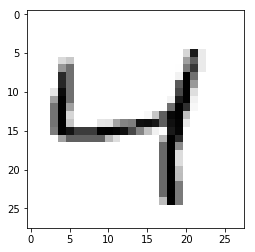

In [53]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[2], cmap="Greys");

In [57]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

In [173]:
import tensorflow as tf
import numpy as np
from tqdm import trange

N_NUMBERS = int(np.unique(y_train).shape[0])
N_VARS    = X_train.shape[1]
BATCH_SIZE = 256

s = tf.InteractiveSession()

# Model parameters - weights and bias
W = tf.Variable(initial_value=tf.random_normal((N_VARS,N_NUMBERS)),dtype="float32")
b = tf.Variable(initial_value=tf.random_normal((1,N_NUMBERS)),dtype="float32")

# Placeholders for the input data
input_X = tf.placeholder("float32",shape=[None,784])
input_y = tf.placeholder("int32")
y_ = tf.one_hot(input_y,depth=N_NUMBERS)# The model code

# Compute a vector of predictions, resulting shape should be [input_X.shape[0],]
# This is 1D, if you have extra dimensions, you can  get rid of them with tf.squeeze .
predicted_y = tf.nn.softmax(tf.matmul(input_X,W)+b)

# Loss. Should be a scalar number - average loss over all the objects
#loss = tf.reduce_mean(-tf.log(predicted_y)*input_y2-tf.log(1-predicted_y)*(1-input_y2))
loss =  tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(predicted_y), axis=1))

optimizer = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(
        loss, var_list=W)
predicted = tf.cast(tf.argmax(predicted_y,axis=1),"int32")
accuracy = tf.reduce_mean(tf.cast(tf.equal(input_y,predicted),"float32"))

s.run(tf.global_variables_initializer())
s.run(tf.local_variables_initializer())


In [101]:
s.run(input_y, {input_X: X_train, input_y: y_train})

array([5, 0, 4, ..., 8, 4, 8], dtype=int32)

In [98]:
s.run(tf.reduce_mean(accuracy), {input_X: X_train, input_y: y_train})

0.092880003

In [ ]:
NRUNS = 1500
losses=np.zeros((NRUNS,))
test_accuracy=np.zeros((NRUNS,))
train_accuracy=np.zeros((NRUNS,))

In [174]:

for i in trange(1500):    
    
    batch_idx = np.random.choice(np.arange(0,X_test.shape[0]),size=BATCH_SIZE)
    
    X_test_mini = X_test[batch_idx,:]
    y_test_mini = y_test[batch_idx]  
    
    X_train_mini = X_train[batch_idx,:]
    y_train_mini = y_train[batch_idx] 
    
    s.run(optimizer, {input_X: X_train_mini, input_y: y_train_mini})
    loss_i[i] = s.run(loss, {input_X: X_train_mini, input_y: y_train_mini})
    
    train_accuracy_i = s.run(accuracy, {input_X: X_train_mini, input_y: y_train_mini})
    test_accuracy_i  = s.run(accuracy,{input_X: X_test_mini, input_y: y_test_mini})
    
    
    train_accuracy.append(train_accuracy_i)
    test_accuracy.append(test_accuracy_i)
    losses.append(loss_i)
    
   # if i % 100 == 0:
       # print("loss at iter %i:%.4f" % (i, loss_i))


100%|██████████| 1500/1500 [00:09<00:00, 153.43it/s]


Final accuracy:0.8913999795913696


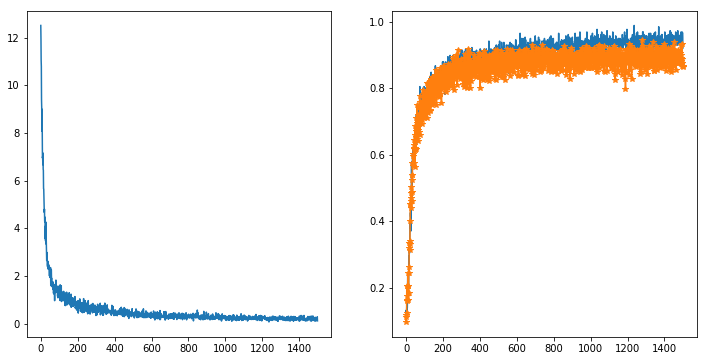

In [175]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(train_accuracy)
plt.plot(test_accuracy,marker="*")
print("Final accuracy:{}".format(s.run(accuracy, {input_X: X_test, input_y: y_test})))

In [ ]:
#https://www.tensorflow.org/get_started/mnist/beginners